# Krzysztof Nalepa
## Sprawozdanie z ćwiczenia 8
## Rozwiązywanie równań nieliniowych 

Funkcje testowe: 
$$f(x) = 2x^2 -2x + 1$$
$$f(x) = -26 + 85x - 91x^2 +44x^3 -8x^4 + x5$$
$$f(x) = 4^x - 3^{2x} + 2^{3x} -1$$
$$f(x) = 3*x + sin(x) - cos^3(x)$$
$$f(x) = 27x^3−3x+1$$

### Zadanie 1:
Zaimplementuj metodą bisekcji. Sprawdź jej działanie na powyższych funkcjach testowych. Dobierz samodzielnie przedział dla poszukiwania miejsca zerowego. Sprawdź dokładnośc metody. 
Oceń szybkość zbieżności dla każdej testowanej funkcji. Zwróć uwagę na sposób doboru E.

In [0]:
def bisection_method(a, b, n, function):
  if function(a) * function(b) >= 0 or n <= 0 or a >= b:
    return None, None
  d = b - a
  for i in range(n):
    c = (a + b) / 2
    if function(c) == 0:
        return c, d / 2 ** i
    if function(c) * function(a) < 0:
      b = c
    else: 
      a = c
  
  E = d / 2 ** n
  return c, E

In [0]:
import math
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

f1 = lambda x: 2 * x ** 2 - 2 * x + 1
f2 = lambda x: -26 + 85 * x - 91 * x ** 2 + 44 * x ** 3 - 8 * x ** 4 + x ** 5
f3 = lambda x: 4 ** x - 3 ** (2 * x) + 2 ** (3 * x) - 1
f4 = lambda x: 3 * x + math.sin(x) - math.cos(x) ** 3
f5 = lambda x: 27 * x ** 3 - 3 * x + 1

def show_charts(function, a, b, i, function_name):
  domain = np.linspace(a, b, i)
  values = np.vectorize(function)(domain)
  plt.plot(domain, values, label = function_name)
  plt.xlabel("X")
  plt.ylabel("Y")
  plt.title(function_name)
  plt.legend()
  plt.show()

def calculate_1(a, b, n, function, function_name):
  c, E = bisection_method(a, b, n, function)
  c = c if c is not None else "None"
  E = E if E is not None else "None"

  table = [[function_name, f"({a}, {b})", n, c, E]]


  print(tabulate(table, headers=['function', 'interval', 'number of iterations', 'value', 'error']), "\n")
  show_charts(function, a, b, 10000, function_name)




function      interval      number of iterations  value    error
------------  ----------  ----------------------  -------  -------
2x^2 -2x + 1  (-1, 2)                        100  None     None 



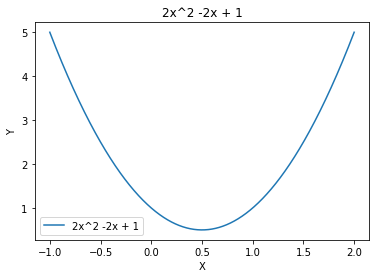

In [58]:
calculate_1(-1, 2, 100, f1, "2x^2 -2x + 1")

function                             interval      number of iterations     value        error
-----------------------------------  ----------  ----------------------  --------  -----------
-26 + 85x - 91x^2 +44x^3 -8x^4 + x5  (-1, 2)                        100  0.557026  2.36658e-30 



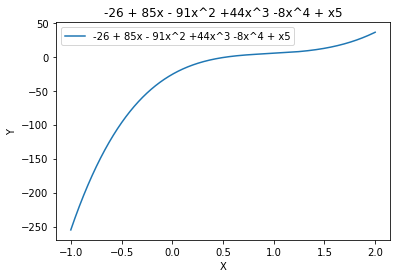

In [0]:
calculate_1(-1, 2, 100, f2, "-26 + 85x - 91x^2 +44x^3 -8x^4 + x5")

function                  interval      number of iterations         value        error
------------------------  ----------  ----------------------  ------------  -----------
4^x - 3^{2x} + 2^{3x} -1  (-2, 0.5)                      100  -2.77556e-17  2.77556e-16 



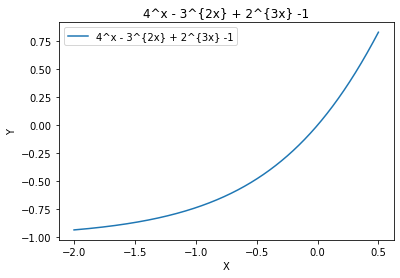

In [155]:
calculate_1(-2, 0.5, 100, f3, "4^x - 3^{2x} + 2^{3x} -1")

function                 interval      number of iterations    value        error
-----------------------  ----------  ----------------------  -------  -----------
3*x + sin(x) - cos^3(x)  (-2, 2)                        100   0.2311  5.55112e-17 



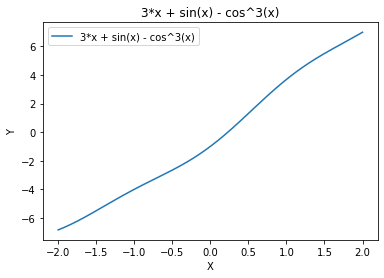

In [60]:
calculate_1(-2, 2, 100, f4, "3*x + sin(x) - cos^3(x)")

function    interval       number of iterations      value        error
----------  -----------  ----------------------  ---------  -----------
27x^3−3x+1  (-0.5, 0.5)                     100  -0.441573  7.88861e-31 



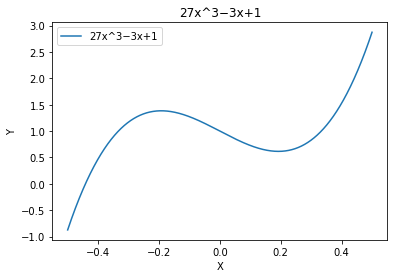

In [61]:
calculate_1(-0.5, 0.5, 100, f5, "27x^3−3x+1")

Metoda bisekcji jest prostym algorytmem służącym do znajdywania miejsc zerowych funkcji. Przy odpowiednim doborze liczby iteracji jesteśmy w stanie uzyskać dobre wyniki o niskim błędzie. Błąd E jest uzyskiwany z poniższego wzoru
$$E=b_N-a_N= \frac{b_{N-1}-a_{N-1}}{2} ... =\frac{b_0-a_0}{2^N}$$

### Zadanie 2: 
Zaimplementuj metodą Newtona-Raphsona.  Sprawdź jej działanie na powyższych funkcjach testowych. Punkt startowy i przedział poszukiwań dobierz samodzielnie (jakie warunki?). 

In [0]:
import scipy.misc as msc

def newton_raphson_method(a, b, n, function):
  if function(a) * function(b) >= 0 or n <= 0 or a >= b:
    return None
  x = b
  
  for i in range(n):
    if msc.derivative(function, x) == 0:
      return None
    h = function(x) / derivative(function, x)
    x = x - h

  return x

In [0]:
def calculate_2(a, b, n, function, function_name):
  c = newton_raphson_method(a, b, n, function)
  c = c if c is not None else "None"

  table = [[function_name, f"({a}, {b})", n, c]]


  print(tabulate(table, headers=['function', 'interval', 'number of iterations', 'value']), "\n")
  show_charts(function, a, b, 10000, function_name)


function      interval      number of iterations  value
------------  ----------  ----------------------  -------
2x^2 -2x + 1  (-1, 2)                        100  None 



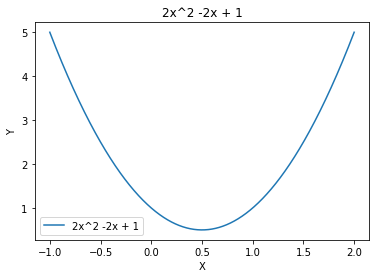

In [72]:
calculate_2(-1, 2, 100, f1, "2x^2 -2x + 1")

function                             interval      number of iterations     value
-----------------------------------  ----------  ----------------------  --------
-26 + 85x - 91x^2 +44x^3 -8x^4 + x5  (-1, 2)                        100  0.557026 



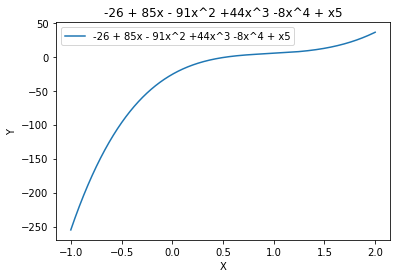

In [75]:
calculate_2(-1, 2, 100, f2, "-26 + 85x - 91x^2 +44x^3 -8x^4 + x5")

function                  interval      number of iterations         value
------------------------  ----------  ----------------------  ------------
4^x - 3^{2x} + 2^{3x} -1  (-2, 0.5)                      100  -7.52038e-18 



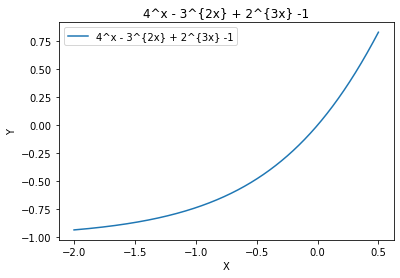

In [154]:
calculate_2(-2, 0.5, 100, f3, "4^x - 3^{2x} + 2^{3x} -1")

function                 interval      number of iterations    value
-----------------------  ----------  ----------------------  -------
3*x + sin(x) - cos^3(x)  (-2, 2)                        100   0.2311 



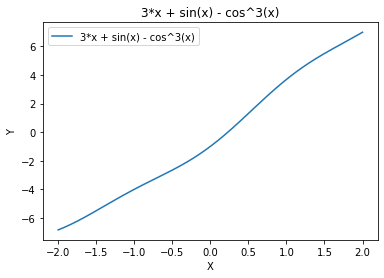

In [77]:
calculate_2(-2, 2, 100, f4, "3*x + sin(x) - cos^3(x)")

function    interval       number of iterations      value
----------  -----------  ----------------------  ---------
27x^3−3x+1  (-0.5, 0.5)                     100  -0.441573 



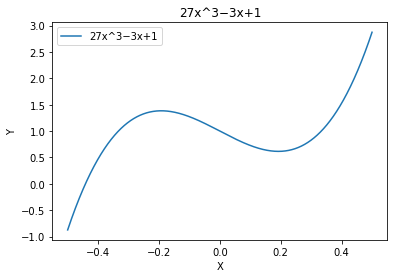

In [78]:
calculate_2(-0.5, 0.5, 100, f5, "27x^3−3x+1")

### Zadanie 3: 
Zaimplementuje metodę siecznych (Eulera). Przedział poszukiwań dobierz samodzielnie (jakie warunki?).

In [0]:
def secant_method(x0, x1, n, function):
  if function(x0) * function(x1) >= 0 or n <= 0 or x0 >= x1:
    return None
  
  for i in range(n):
    x2 = x1 - (function(x1) * (x1 - x0)) / (function(x1) - function(x0))
    x0, x1 = x1, x2
  return x2

In [0]:
def calculate_3(a, b, n, function, function_name):
  c = secant_method(a, b, n, function)
  c = c if c is not None else "None"

  table = [[function_name, f"({a}, {b})", n, c]]


  print(tabulate(table, headers=['function', 'interval', 'number of iterations', 'value']), "\n")
  show_charts(function, a, b, 10000, function_name)

function      interval      number of iterations  value
------------  ----------  ----------------------  -------
2x^2 -2x + 1  (-1, 2)                         10  None 



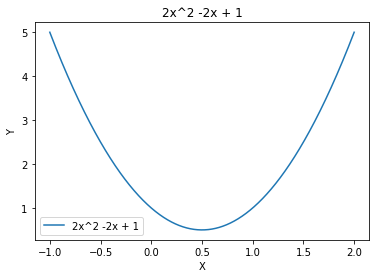

In [124]:
calculate_3(-1, 2, 10, f1, "2x^2 -2x + 1")

function                             interval      number of iterations     value
-----------------------------------  ----------  ----------------------  --------
-26 + 85x - 91x^2 +44x^3 -8x^4 + x5  (-1, 2)                         10  0.557026 



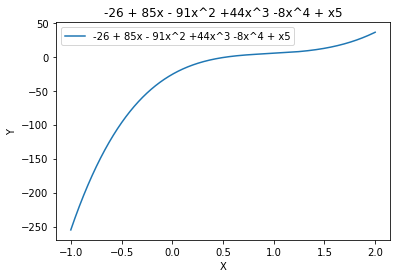

In [125]:
calculate_3(-1, 2, 10, f2, "-26 + 85x - 91x^2 +44x^3 -8x^4 + x5")

function                  interval      number of iterations         value
------------------------  ----------  ----------------------  ------------
4^x - 3^{2x} + 2^{3x} -1  (-2, 0.5)                       10  -1.13904e-17 



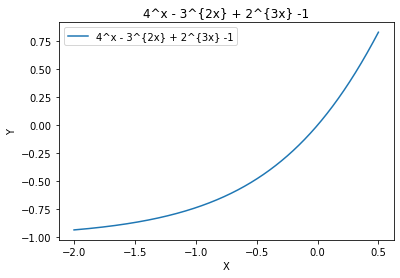

In [156]:
calculate_3(-2, 0.5, 10, f3, "4^x - 3^{2x} + 2^{3x} -1")

function                 interval      number of iterations    value
-----------------------  ----------  ----------------------  -------
3*x + sin(x) - cos^3(x)  (-2, 2)                          8   0.2311 



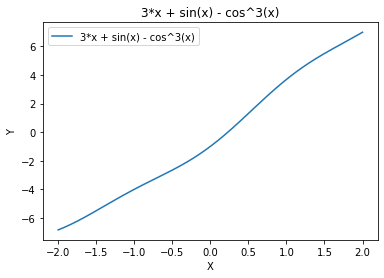

In [128]:
calculate_3(-2, 2, 8, f4, "3*x + sin(x) - cos^3(x)")

function    interval       number of iterations      value
----------  -----------  ----------------------  ---------
27x^3−3x+1  (-0.5, 0.5)                      10  -0.441573 



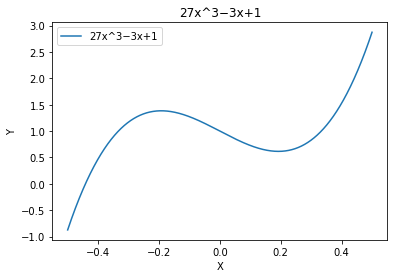

In [129]:
calculate_3(-0.5, 0.5, 10, f5, "27x^3−3x+1")

### Zadanie 4: 
Wybierz jedną z metod rozwiązywania równań nieliniowych dostępna w bibliotece numpy lub scipy.  Porównaj dokładność wszystkiech czterech metod.


In [0]:
from scipy import optimize
def compare(a, b, n, function, function_name):
  c1, E = bisection_method(a, b, n, function)
  c1 = c1 if c1 is not None else "None"
  scipy_value = optimize.bisect(function, a, b)

  table = []
  table.append([function_name, f"({a}, {b})", n, c1, scipy_value,  abs(c1 - scipy_value) / abs(scipy_value)])

  c2 = newton_raphson_method(a, b, n, function)
  c2 = c2 if c2 is not None else "None"

  table.append([function_name, f"({a}, {b})", n, c2, scipy_value,  abs(c2 - scipy_value) / abs(scipy_value)])

  c3 = secant_method(a, b, n, function)
  c3 = c3 if c3 is not None else "None"

  table.append([function_name, f"({a}, {b})", n, c3, scipy_value,  abs(c3 - scipy_value) / abs(scipy_value)])




  print(tabulate(table, headers=['function', 'interval', 'number of iterations', 'value', 'scipy value', 'relative error']), "\n")



In [144]:
compare(-1, 2, 10, f2, "-26 + 85x - 91x^2 +44x^3 -8x^4 + x5")

function                             interval      number of iterations     value    scipy value    relative error
-----------------------------------  ----------  ----------------------  --------  -------------  ----------------
-26 + 85x - 91x^2 +44x^3 -8x^4 + x5  (-1, 2)                         10  0.555664       0.557026       0.00244415
-26 + 85x - 91x^2 +44x^3 -8x^4 + x5  (-1, 2)                         10  0.574792       0.557026       0.0318951
-26 + 85x - 91x^2 +44x^3 -8x^4 + x5  (-1, 2)                         10  0.557026       0.557026       7.59382e-13 



In [157]:
compare(-2, 0.5, 10, f3, "4^x - 3^{2x} + 2^{3x} -1")

function                  interval      number of iterations         value    scipy value    relative error
------------------------  ----------  ----------------------  ------------  -------------  ----------------
4^x - 3^{2x} + 2^{3x} -1  (-2, 0.5)                       10  -0.000488281   -6.82121e-13       7.15828e+08
4^x - 3^{2x} + 2^{3x} -1  (-2, 0.5)                       10  -1.72362e-12   -6.82121e-13       1.52686
4^x - 3^{2x} + 2^{3x} -1  (-2, 0.5)                       10  -1.13904e-17   -6.82121e-13       0.999983 



In [158]:
compare(-2, 2, 8, f4, "3*x + sin(x) - cos^3(x)")

function                 interval      number of iterations     value    scipy value    relative error
-----------------------  ----------  ----------------------  --------  -------------  ----------------
3*x + sin(x) - cos^3(x)  (-2, 2)                          8  0.234375         0.2311       0.0141731
3*x + sin(x) - cos^3(x)  (-2, 2)                          8  0.2311           0.2311       3.05073e-06
3*x + sin(x) - cos^3(x)  (-2, 2)                          8  0.2311           0.2311       1.83624e-12 



In [163]:
compare(-0.5, 0.5, 10, f5, "27x^3−3x+1")

function    interval       number of iterations      value    scipy value    relative error
----------  -----------  ----------------------  ---------  -------------  ----------------
27x^3−3x+1  (-0.5, 0.5)                      10  -0.442383      -0.441573       0.00183472
27x^3−3x+1  (-0.5, 0.5)                      10   0.170182      -0.441573       1.3854
27x^3−3x+1  (-0.5, 0.5)                      10  -0.441573      -0.441573       2.60447e-10 



Jak widać metoda siecznych jest zdecydowanie bardziej dokładna niż pozostałe metody